##Problem Statement: Airbnb Hotel Booking Analysis.
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism.
Leading this revolution is Airob, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbb operates on a commission based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.
This research analysis delves into the New York City Airbb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

#QUESTIONS
##This project is aimed to uncover some insights from the Airbb Open Data. The following questions would be answered from the data.
1. What are the different property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhoods group have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

#DATA WRANGLING
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', engine='c')


#ACCESS THE DATA

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/21,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/22,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/19,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/18,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5245 non-null   int64  
 1   NAME                            5187 non-null   object 
 2   host id                         5244 non-null   float64
 3   host_identity_verified          5171 non-null   object 
 4   host name                       5224 non-null   object 
 5   neighbourhood group             5217 non-null   object 
 6   neighbourhood                   5228 non-null   object 
 7   lat                             5236 non-null   float64
 8   long                            5236 non-null   float64
 9   country                         5194 non-null   object 
 10  country code                    5165 non-null   object 
 11  instant_bookable                5165 non-null   object 
 12  cancellation_policy             51

In [ ]:
df.duplicated().value_counts()

,count
False,5245


In [ ]:
# Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df[ 'neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",2.680241e+10,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/19,1.34,4.0,3.0,47.0,NaN,NaN


#Problems Identified within the Data
##• 541 duplicated Records where found in the Data.
##• Insufficient information were recorded for the house_rules and Licence columns.
##• Dollar signs and commas recorded along with the values for price and service fee.
##• The currency for price and service fee were not added to the column's titles.
##• Missing values in some records
##• Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes.
##• In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.
##• Some outliers were identified in the availability 365 column.

#Steps to be Taken for Data Cleaning
口
###• Drop duplicated records.
###• Drop house_rules and license columns with insufficient data.
###• Remove all dollar signs in the price and service fee columns.
###• Remove all commas from the price and service fee columns.
###• Rename the price and service fee columns to include a dollar signs.
###• Drop all records with missing values.
###• Change all mismatched data types to the appropriate once.
###• Correct the Spelling of 'brookin' to 'Brooklyn'
###• Get rid of outliers in the 'availability 365' column data.

In [ ]:
import pandas as pd

# --- Robust Airbnb Data Cleaning Pipeline ---

# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop columns with insufficient data (ignore if missing)
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Standardize column names for easier handling
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Remove $ and commas from price and service fee (if present)
if 'price' in df.columns:
    df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df.rename(columns={'price': 'price_$'}, inplace=True)

if 'service_fee' in df.columns:
    df['service_fee'] = df['service_fee'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df.rename(columns={'service_fee': 'service_fee_$'}, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert datatypes safely
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)
if 'id' in df.columns:
    df['id'] = df['id'].astype(str)
if 'host_id' in df.columns:
    df['host_id'] = df['host_id'].astype(str)
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
if 'construction_year' in df.columns:
    df['construction_year'] = df['construction_year'].astype(int)

# Fix spelling error in neighbourhood group
if 'neighbourhood_group' in df.columns:
    df.loc[df['neighbourhood_group'] == 'brookln', 'neighbourhood_group'] = 'Brooklyn'

# Remove outliers in 'availability_365' (if present)
if 'availability_365' in df.columns:
    df = df.drop(df[df['availability_365'] > 500].index)

# Optional: reset index after dropping rows
df.reset_index(drop=True, inplace=True)


/tmp/ipython-input-1585429693.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [ ]:
df.duplicated().value_counts()

,count
False,4247


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4247 non-null   object        
 1   name                            4247 non-null   object        
 2   host_id                         4247 non-null   object        
 3   host_identity_verified          4247 non-null   object        
 4   host_name                       4247 non-null   object        
 5   neighbourhood_group             4247 non-null   object        
 6   neighbourhood                   4247 non-null   object        
 7   lat                             4247 non-null   float64       
 8   long                            4247 non-null   float64       
 9   country                         4247 non-null   object        
 10  country_code                    4247 non-null   object        
 11  inst

#EXPLORATORY DATA ANALYSIS (EDA)
Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. In the context of an Airbb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

##Summary Statistics

In [ ]:
df.describe()

,lat,long,construction_year,price_$,service_fee_$,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247.000000,4247,4247.000000,4247.000000,4247.000000,4247.000000
mean,40.728460,-73.960208,2012.349894,618.082882,123.617142,9.004474,58.963739,2018-05-22 07:22:28.622557184,0.891573,2.998823,2.584177,207.389451
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688255,-73.984150,2007.000000,324.000000,65.000000,2.000000,8.000000,2017-08-19 12:00:00,0.140000,2.000000,1.000000,98.000000
50%,40.722120,-73.959690,2012.000000,619.000000,124.000000,3.000000,26.000000,2019-04-21 00:00:00,0.440000,3.000000,1.000000,208.000000
75%,40.762945,-73.944240,2017.000000,911.500000,182.000000,5.000000,80.500000,2019-06-19 00:00:00,1.250000,4.000000,2.000000,316.000000
max,40.908040,-73.739550,2022.000000,1200.000000,240.000000,452.000000,607.000000,2022-05-21 00:00:00,10.000000,5.000000,96.000000,426.000000
std,0.051867,0.035384,5.749604,336.551426,67.318804,26.278397,75.517549,NaN,1.097585,1.426071,6.617638,125.422344


#What are the different property types in the Dataset?

In [ ]:
#what are the different property types in the Dataset?
property_types = df['room_type'].value_counts(). to_frame()
property_types

,count
room_type,
Entire home/apt,2570
Private room,1624
Shared room,53


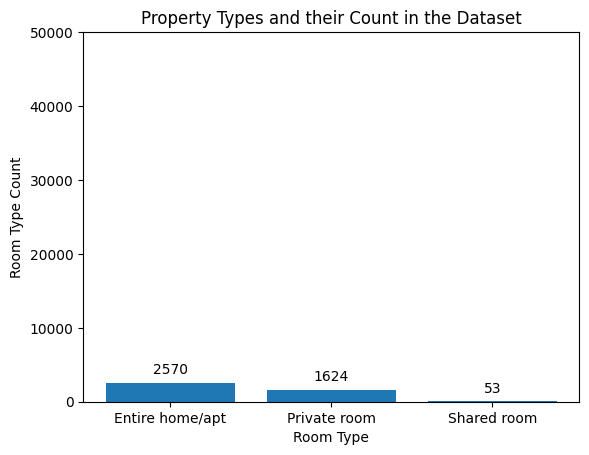

In [ ]:
# Assuming 'property_types' is a DataFrame with index = room types and a column 'count'

# Plot bar chart
room_type_bar = plt.bar(property_types.index, property_types['count'])

# Add labels on top of bars
plt.bar_label(room_type_bar, labels=property_types['count'], padding=4)

# Set limits, labels, and title
plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their Count in the Dataset')

# Show plot
plt.show()

#The Airbb open dataset reveals four distinct property or room types. These categories comprise;
###• Entire home/apt
###• Private room
###• Shared room
###• Hotel room
###Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurrences, followed by Private room with 37,494 Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.

In [ ]:
hood_group = df['neighbourhood_group'].value_counts().to_frame()
hood_group

,count
neighbourhood_group,
Manhattan,1947
Brooklyn,1925
Queens,294
Bronx,58
Staten Island,23


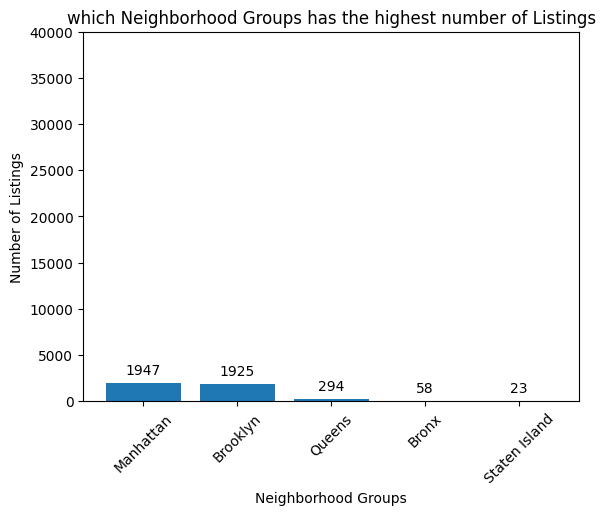

In [ ]:
#which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count" ]);
plt. bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4 );
plt.ylim([0,40000]);
plt.xlabel ('Neighborhood Groups'); plt.ylabel ('Number of Listings');
plt.xticks(rotation = 45);
plt.title('which Neighborhood Groups has the highest number of Listings');

The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the barchart, Brooklyn has the highest number of listings with 34636, followed closely by Manhattan with 34566.

#Which neighborhoods group have the highest average prices for Airbnb listings?

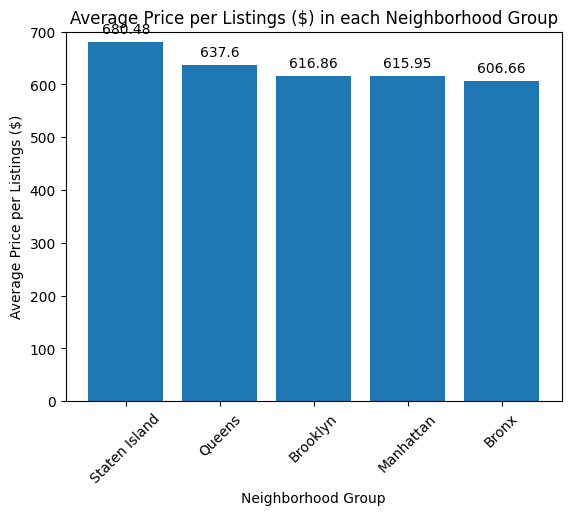

In [ ]:
#which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby ('neighbourhood_group') ['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar,
labels = round (avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4 );
plt.ylim([0,700]);
plt.xlabel ('Neighborhood Group');
plt.ylabel ('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt. title('Average Price per Listings ($) in each Neighborhood Group');

Among the five identified neighborhood groups in the dataset, Queens boasts the highest average listing price at 630.46 USD, closely trailed by the Bronx with an average listing price of 630.20 USD. Conversely, Staten Island records the lowest average listing price at 622.13 USD.

#Is there a relationship between the construction year of property and price?

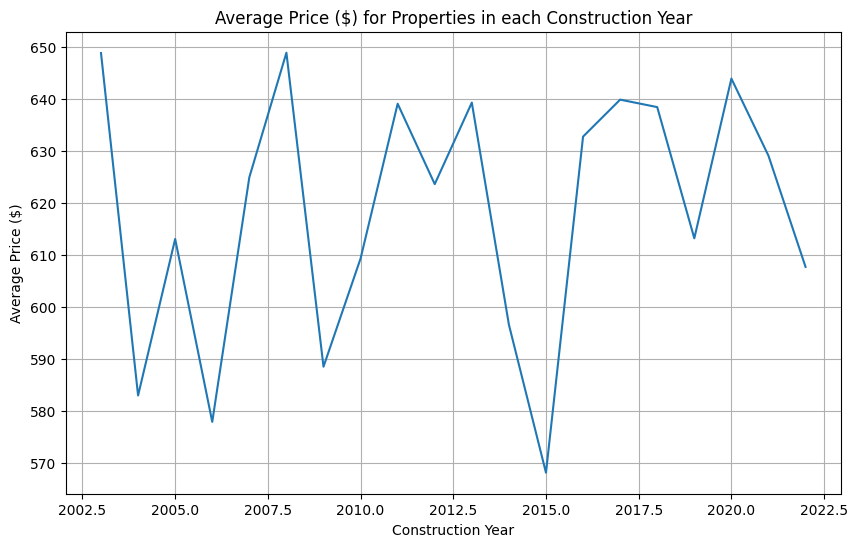

In [ ]:
# Ensure construction year is integer
df['construction_year'] = df['construction_year'].astype(int)

# Group by year and plot
df.groupby('construction_year')['price_$'].mean().plot(kind='line', figsize=(10,6))

plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')
plt.grid(True)
plt.show()


The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices as the construction years progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as time progresses.|

#Who are the top 10 hosts by calculated host listing count?

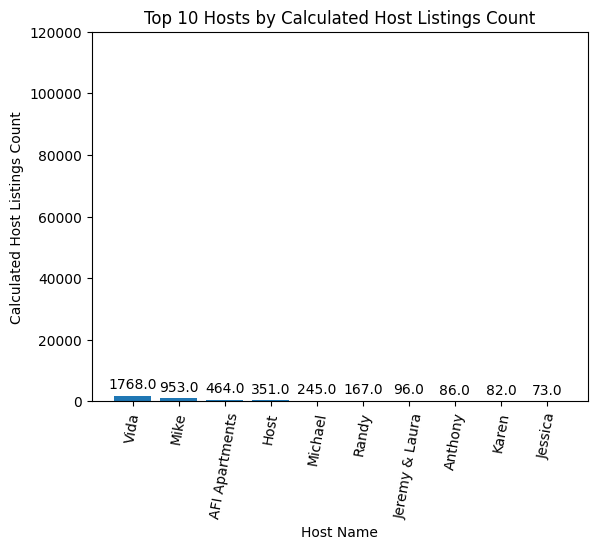

In [31]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending=False).nlargest(10).to_frame()

# Plot
hosts_bar = plt.bar(hosts.index, hosts['calculated_host_listings_count'])
plt.bar_label(hosts_bar, labels=hosts['calculated_host_listings_count'], label_type='edge', padding=3)

plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()


The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings.
Subsequently, the other hosts follow in descending order.
• Karen at second postion with 42410 hosts
• Jeniffer at third position with 31447 hosts
• Blueground at fourth position with 21168 hosts
• Kaz at fifth position with 17552 hosts
• Corporate Housing at sixth position with 14833 hosts
• Soya at seventh positon with 10260 hosts
• Stay with vibe at eight position with 10260 hosts
• Kara at ninth position with 10092 hosts
• and finally Jeremy and Laura at tenth position 10080 hosts
Are hosts with verified identities more likely to receive positive reviews?

In [33]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending = False). to_frame()
review

,review_rate_number
host_identity_verified,
unconfirmed,3.033164
verified,2.962909


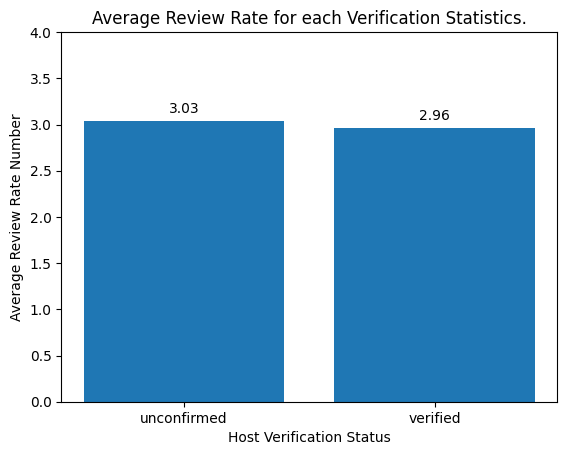

In [35]:
review_bar = plt.bar(review.index, review.loc[:, "review_rate_number"]);
plt. bar_label(review_bar, labels = round (review. loc[:,"review_rate_number"], 2), padding = 4 );
plt.ylim([0,4]);
plt.xlabel ('Host Verification Status'); plt.ylabel ('Average Review Rate Number');
plt.title( 'Average Review Rate for each Verification Statistics.');

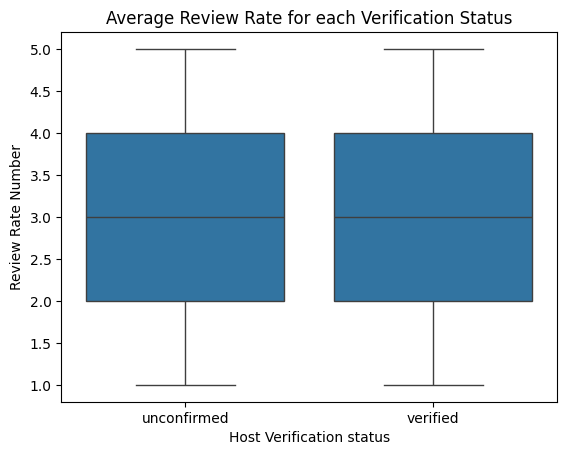

In [37]:
base_color = sns.color_palette() [0]
sns.boxplot (data = df, x = "host_identity_verified", y = "review_rate_number", color = base_color);
plt.xlabel('Host Verification status'); plt.ylabel ('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

#Is there a correlation between the price of a listing and its service fee?

In [38]:
#Is there a correlation between the price of a listing and its service fee?
df[ 'price_$'].corr(df['service_fee_$'])

np.float64(0.9999912906414408)

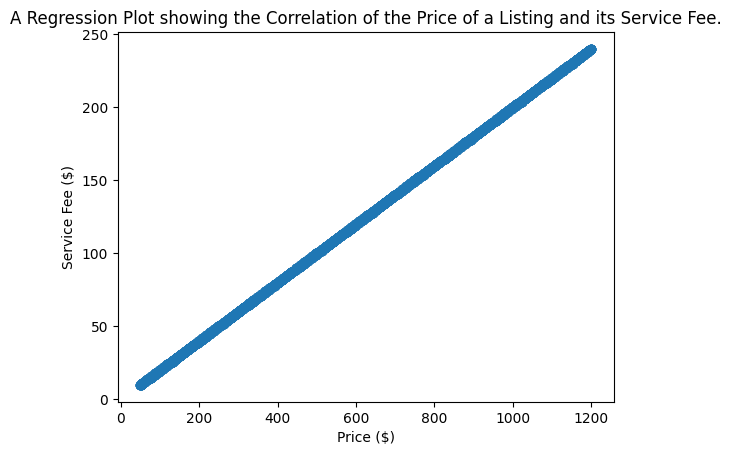

In [40]:
sns.regplot(data=df, x='price_$', y='service_fee_$');
plt. xlabel ('Price ($)');
plt.ylabel ('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

The Pearson correlation coefficient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [42]:
#what is the average review rate number (e.g-, stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().to_frame()
ARRN

review_rate_number
neighbourhood_group room_type                          
Bronx               Entire home/apt            2.941176
                    Private room               3.025641
                    Shared room                1.000000
Brooklyn            Entire home/apt            2.945671
                    Private room               3.086420
                    Shared room                2.555556
Manhattan           Entire home/apt            3.019355
                    Private room               3.035294
                    Shared room                2.851852
Queens              Entire home/apt            2.801587
                    Private room               2.981481
                    Shared room                3.333333
Staten Island       Entire home/apt            2.777778
                    Private room               2.428571

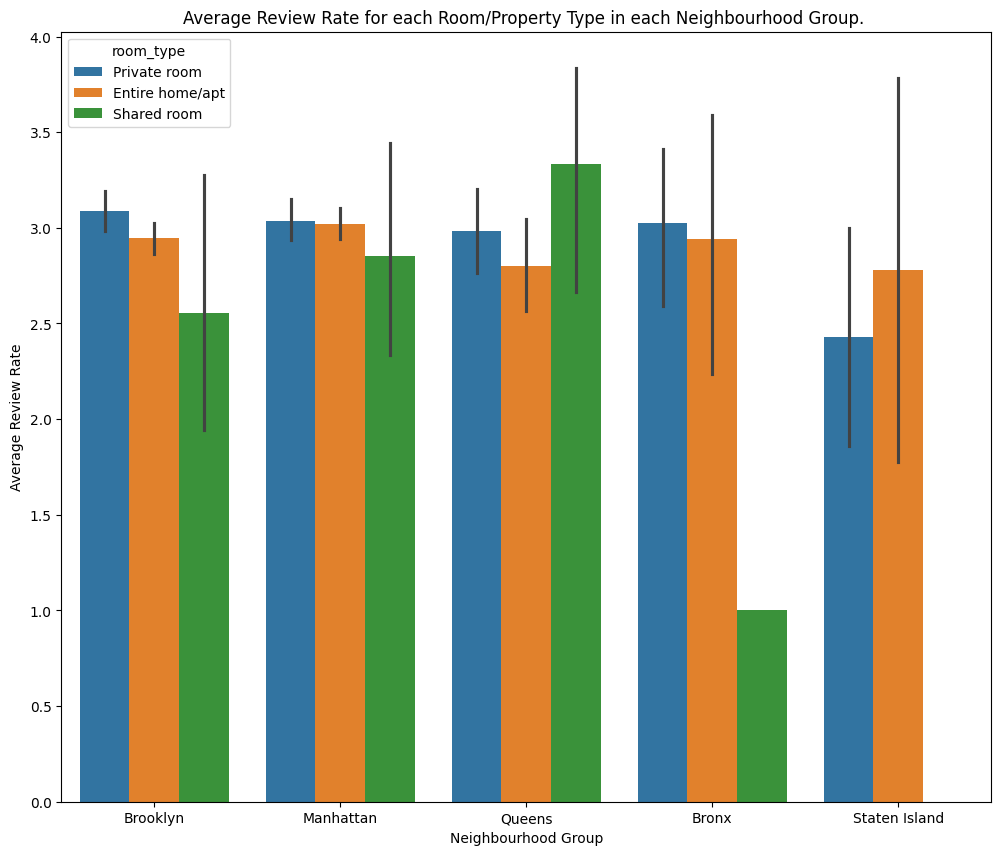

In [45]:
plt.figure(figsize = (12,10));
sns. barplot(data = df, x = 'neighbourhood_group', y = 'review_rate_number', hue = 'room_type' );
plt.xlabel ('Neighbourhood Group'); plt.ylabel ('Average Review Rate');
plt. title('Average Review Rate for each Room/Property Type in each Neighbourhood Group. ');

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located:
Brooklyn, Manhattan, and Queens.

#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

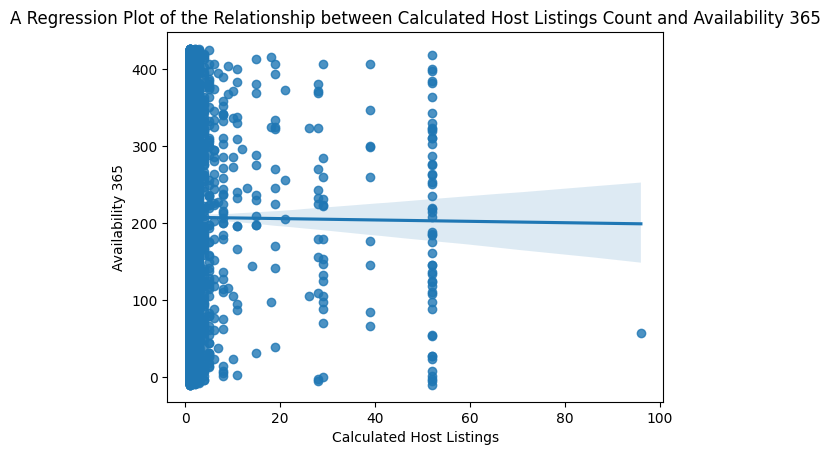

In [47]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(data=df, x = 'calculated_host_listings_count', y
= 'availability_365');
plt.xlabel ('Calculated Host Listings'); plt.ylabel ('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [49]:
df['calculated_host_listings_count'].corr(df['availability_365'])

np.float64(-0.004699883303428584)

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

#Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.
Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.
Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.